In [1]:
import os
import fileinput
import glob
import numpy as np
import pandas as pd
import csv

In [4]:
#file_path = "/path to/Spectral_DataSet.xlsx"
file_path = "Spectral_DataSet.xlsx"
df_cleaned_loaded = pd.read_excel(file_path)

In [16]:
df_cleaned_loaded

,350nm,351nm,352nm,353nm,354nm,355nm,356nm,357nm,358nm,359nm,...,2495nm,2496nm,2497nm,2498nm,2499nm,2500nm,Class,Zone,Position,Year
0,0.092700,0.084310,0.078060,0.077534,0.082693,0.079550,0.078384,0.079797,0.075924,0.076236,...,0.087000,0.086043,0.085366,0.084690,0.084111,0.083716,3,0,0,0
1,0.132330,0.133711,0.131412,0.127078,0.127226,0.123336,0.118370,0.114158,0.110621,0.108856,...,0.069373,0.068469,0.067770,0.067007,0.066157,0.065605,2,1,1,0
2,0.102862,0.091420,0.081575,0.080287,0.084543,0.089455,0.084264,0.075563,0.081183,0.081350,...,0.101842,0.100976,0.100241,0.099636,0.098900,0.098227,3,0,0,0
3,0.146099,0.145149,0.139953,0.132622,0.129913,0.128680,0.124586,0.119940,0.121392,0.119029,...,0.062054,0.061305,0.060677,0.060202,0.059952,0.059615,2,1,1,0
4,0.108049,0.096319,0.092380,0.098131,0.104531,0.094118,0.085321,0.085279,0.088971,0.089526,...,0.153882,0.152481,0.151338,0.150458,0.149655,0.148868,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14631,0.173197,0.171963,0.163455,0.154526,0.156387,0.151651,0.145788,0.143070,0.144273,0.142116,...,0.120817,0.119518,0.118486,0.117360,0.116399,0.115532,1,5,1,4
14632,0.161815,0.154353,0.146218,0.143560,0.147839,0.148196,0.143832,0.137233,0.132720,0.133338,...,0.087281,0.086352,0.085560,0.085077,0.084332,0.083589,3,0,0,4
14633,0.192253,0.184696,0.179862,0.175460,0.168593,0.170145,0.167317,0.159673,0.157935,0.157036,...,0.095112,0.094221,0.093120,0.092573,0.092338,0.091842,2,2,1,4
14634,0.198535,0.194379,0.191560,0.189825,0.187291,0.180795,0.176544,0.174519,0.169624,0.166258,...,0.149049,0.147860,0.146699,0.145830,0.144993,0.144090,2,2,1,4


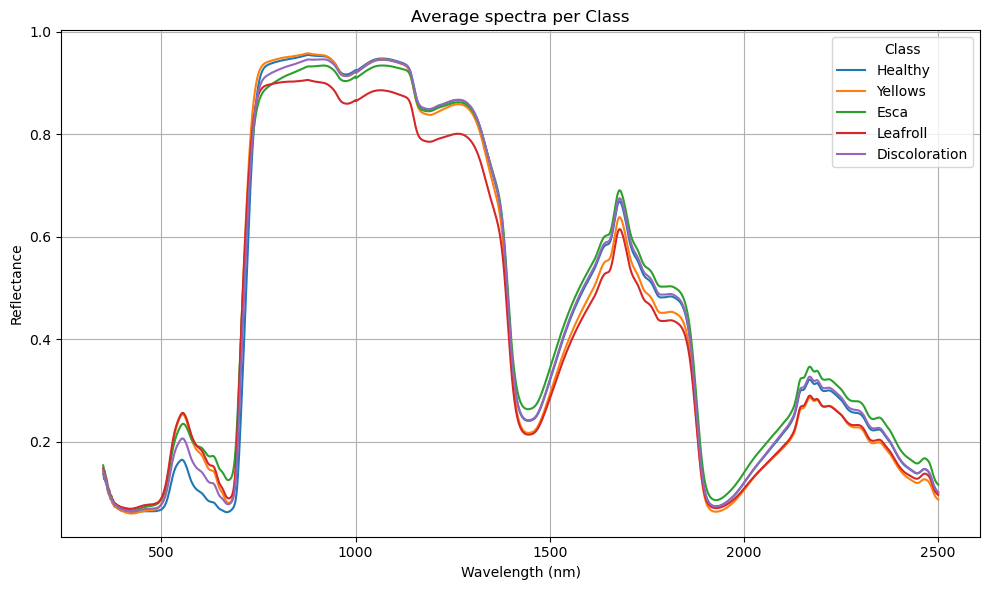

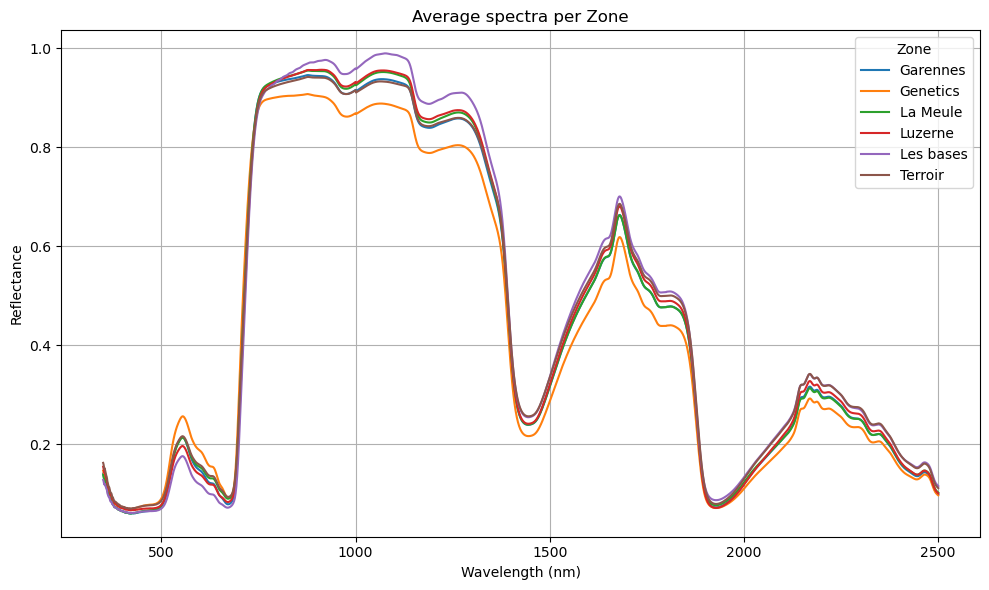

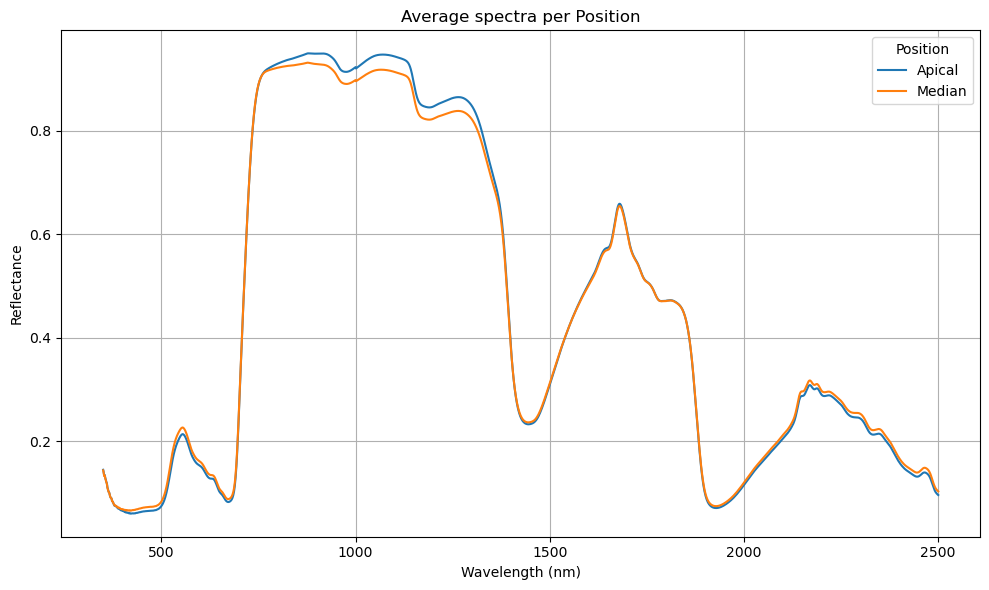

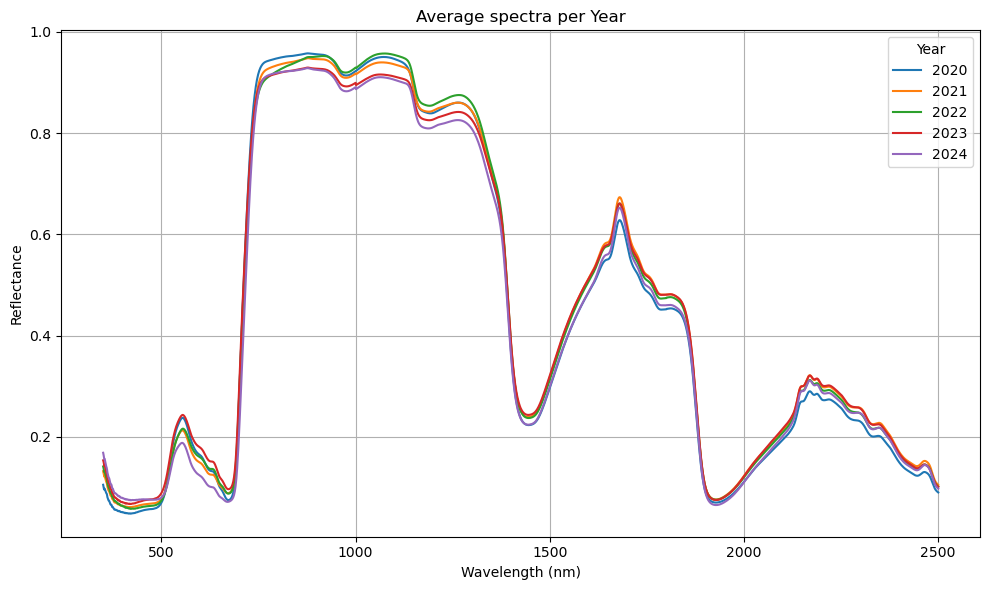

In [17]:
import matplotlib.pyplot as plt

# Define the mappings for labels
class_mapping = {0: 'Leafroll', 1: 'Esca', 2: 'Yellows', 3: 'Healthy', 4: 'Discoloration'}
zone_mapping = {0: 'Garennes', 1: 'Genetics', 2: 'La Meule', 3: 'Les bases', 4: 'Luzerne', 5: 'Terroir'}
position_mapping = {0: 'Apical', 1: 'Median'}
year_mapping = {0: 2020, 1: 2021, 2: 2022, 3: 2023, 4: 2024}

df = df_cleaned_loaded.copy()

label_columns = ['Class', 'Zone', 'Position', 'Year']


spectral_columns = df.columns[:2151]

# This assumes each spectral column corresponds to a 1 nm increment.
wavelengths = np.arange(350, 350 + len(spectral_columns))

# Plot average spectra for each label
for label in label_columns:
    plt.figure(figsize=(10, 6))
    
    for variety in df[label].unique():
        avg_spectrum = df[df[label] == variety][spectral_columns].mean()
        
        if label == 'Class':
            custom_label = class_mapping.get(variety, str(variety))
        elif label == 'Zone':
            custom_label = zone_mapping.get(variety, str(variety))
        elif label == 'Position':
            custom_label = position_mapping.get(variety, str(variety))
        elif label == 'Year':
            custom_label = year_mapping.get(variety, str(variety))
        
        plt.plot(wavelengths, avg_spectrum.values, label=custom_label)
    
    plt.title(f"Average spectra per {label.capitalize()}")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Reflectance")
    plt.legend(title=label)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [18]:
spectral_columns

Index(['350nm', '351nm', '352nm', '353nm', '354nm', '355nm', '356nm', '357nm',
       '358nm', '359nm',
       ...
       '2491nm', '2492nm', '2493nm', '2494nm', '2495nm', '2496nm', '2497nm',
       '2498nm', '2499nm', '2500nm'],
      dtype='object', length=2151)

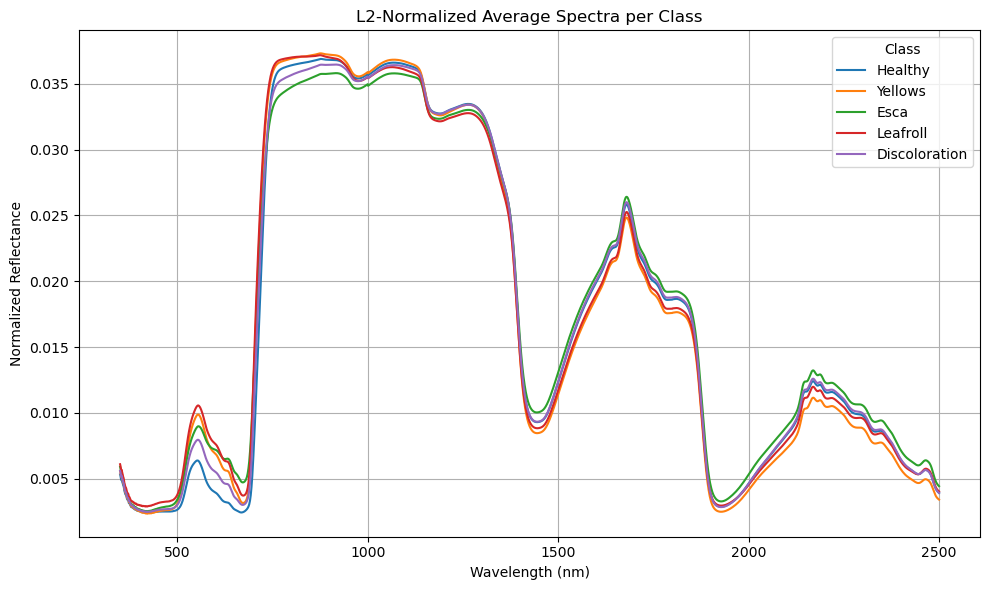

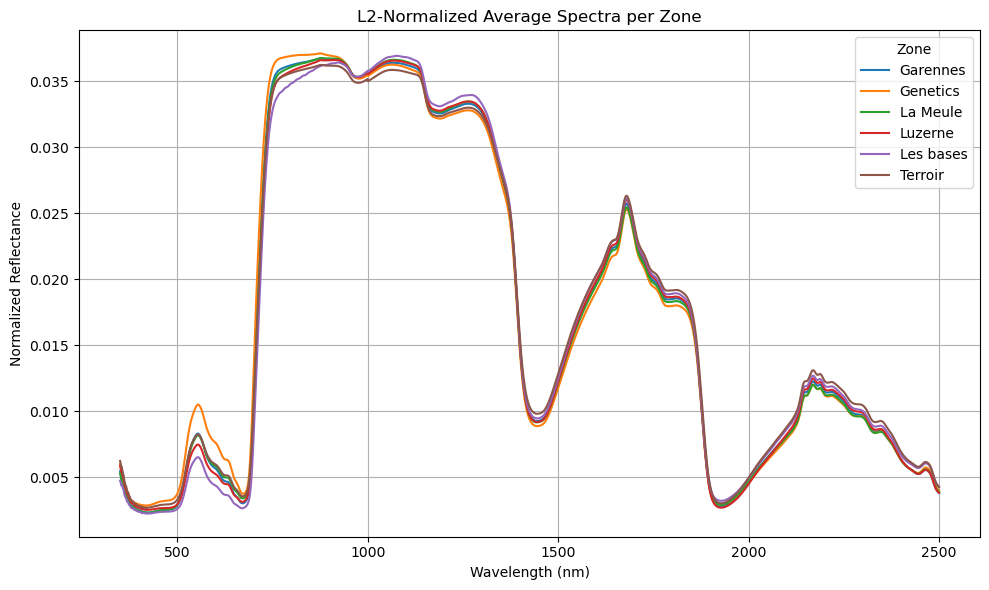

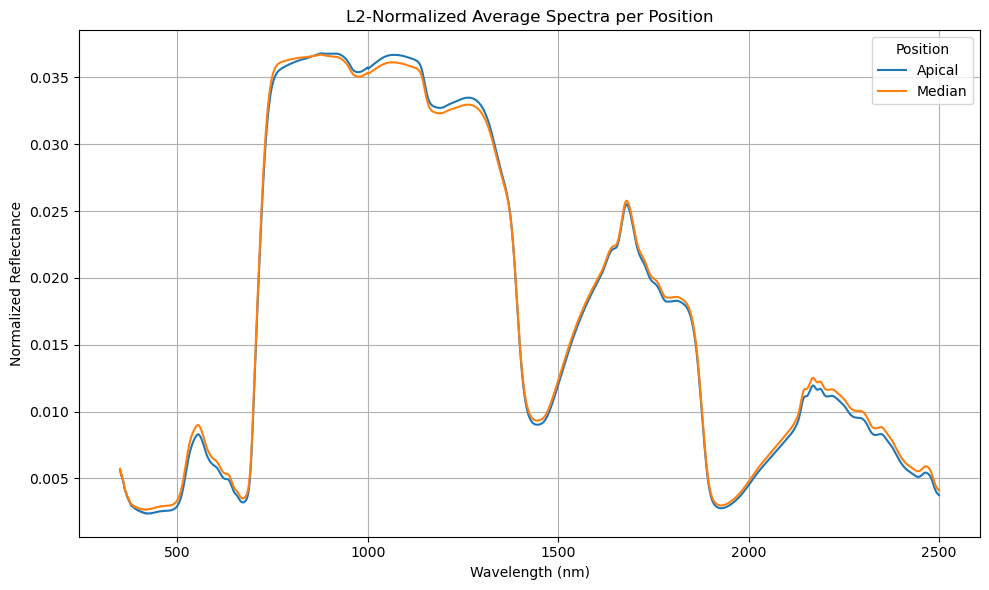

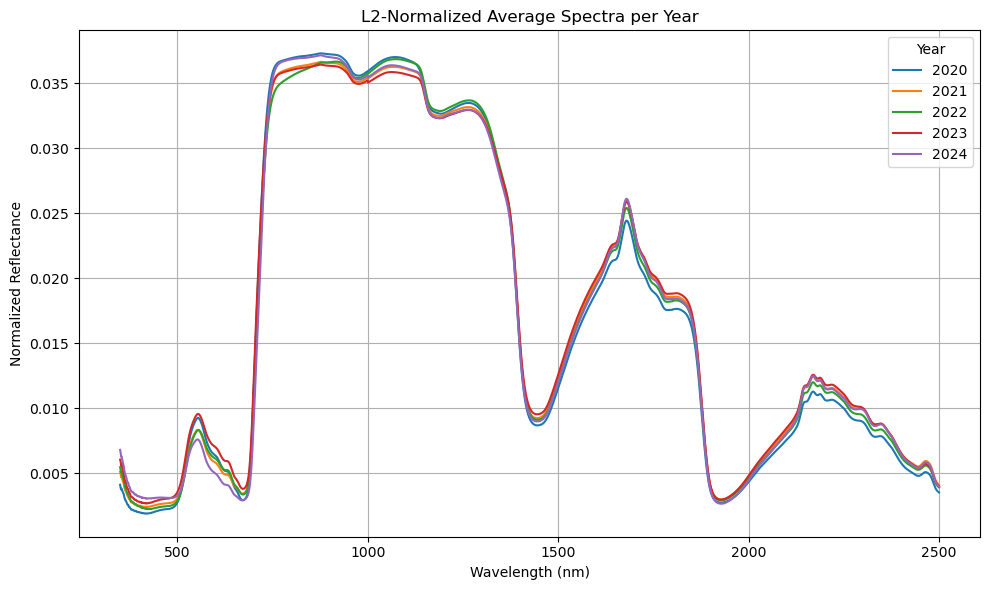

In [19]:
from sklearn import preprocessing

# Function to normalize spectra
def normalize_with_labels(data):
    spectra = data[:, :-1]  
    labels = data[:, -1]    
    normalized_spectra = preprocessing.normalize(spectra, norm='l2')  # Apply L2 normalization
    return np.column_stack((normalized_spectra, labels))  
df = df_cleaned_loaded.copy()

label_columns = ['Class', 'Zone', 'Position', 'Year']
spectral_columns = df.columns[:2151]
wavelengths = np.arange(350, 350 + len(spectral_columns))

# Plot L2-normalized average spectra
for label in label_columns:
    plt.figure(figsize=(10, 6))
    for variety in df[label].unique():
        subset = df[df[label] == variety]     
        spectra_data = subset[spectral_columns].to_numpy()
        labels_data = np.full((spectra_data.shape[0], 1), variety)
        combined_data = np.hstack((spectra_data, labels_data))
        normalized_data = normalize_with_labels(combined_data)
        normalized_spectra = normalized_data[:, :-1]
        avg_spectrum = np.mean(normalized_spectra, axis=0)
        if label == 'Class':
            custom_label = class_mapping.get(variety, str(variety))
        elif label == 'Zone':
            custom_label = zone_mapping.get(variety, str(variety))
        elif label == 'Position':
            custom_label = position_mapping.get(variety, str(variety))
        elif label == 'Year':
            custom_label = year_mapping.get(variety, str(variety))
        
        plt.plot(wavelengths, avg_spectrum, label=custom_label)
    
    plt.title(f"L2-Normalized Average Spectra per {label}")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Normalized Reflectance")
    plt.legend(title=label)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


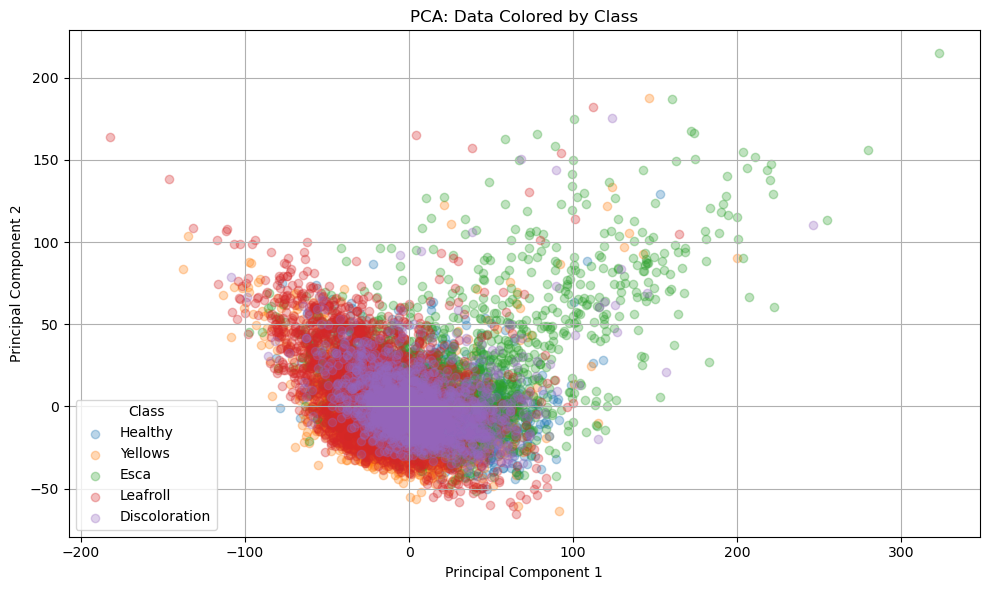

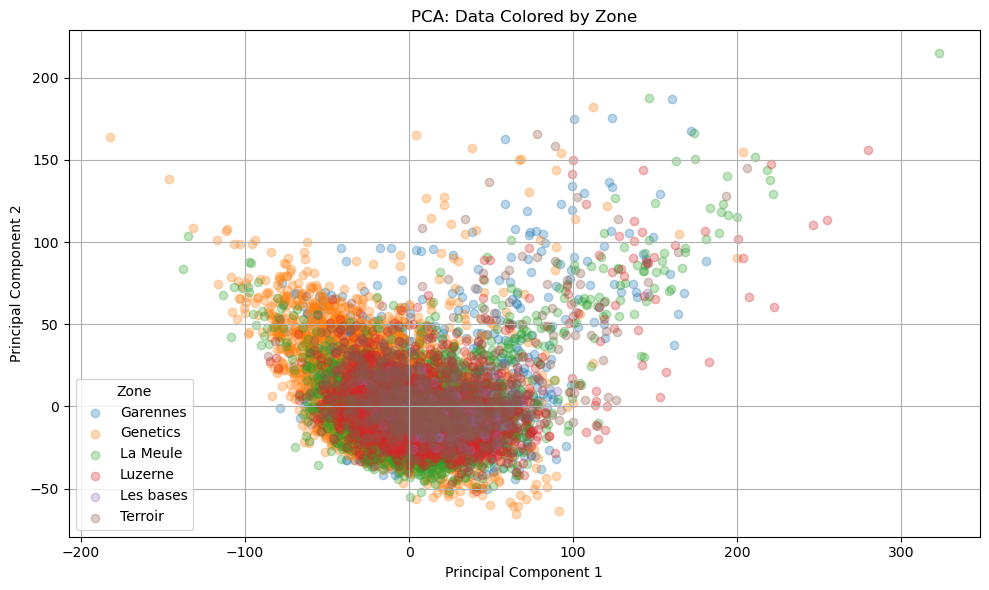

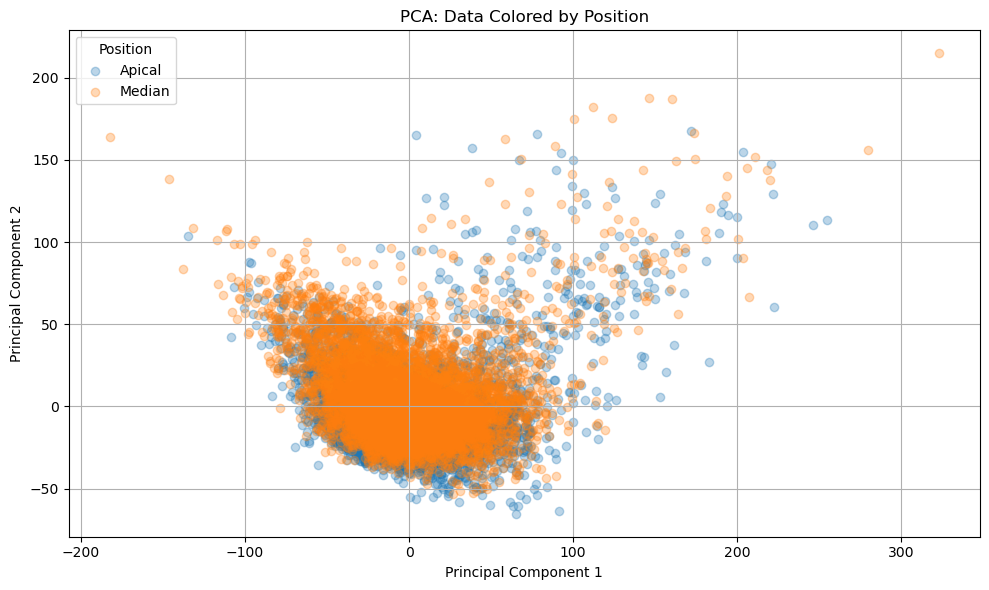

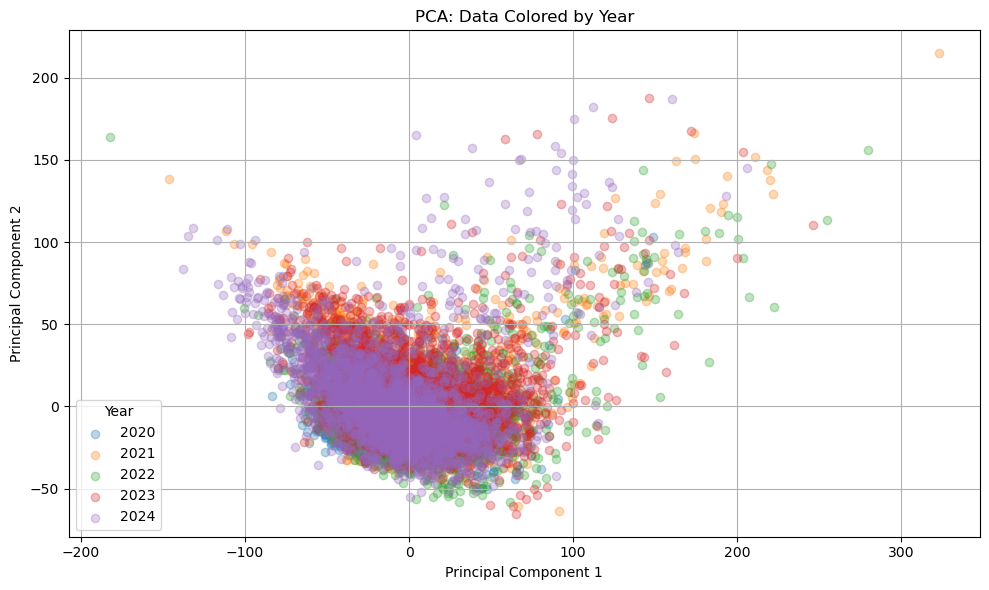

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = df_cleaned_loaded.copy()
label_columns = ['Class', 'Zone', 'Position', 'Year']
spectral_columns = df.columns[:2151]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[spectral_columns])


pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

for label in label_columns:
    plt.figure(figsize=(10, 6))
    
    for variety in df[label].unique():
        idx = df[df[label] == variety].index
        plt.scatter(X_pca[idx, 0], X_pca[idx, 1], alpha=0.3, label=f"{variety}")  # alpha ajouté ici
    
    if label == 'Class':
        plt.legend(title="Class", labels=[class_mapping.get(val, str(val)) for val in df[label].unique()])
    elif label == 'Zone':
        plt.legend(title="Zone", labels=[zone_mapping.get(val, str(val)) for val in df[label].unique()])
    elif label == 'Position':
        plt.legend(title="Position", labels=[position_mapping.get(val, str(val)) for val in df[label].unique()])
    elif label == 'Year':
        plt.legend(title="Year", labels=[year_mapping.get(val, str(val)) for val in df[label].unique()])
    
    plt.title(f"PCA: Data Colored by {label.capitalize()}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


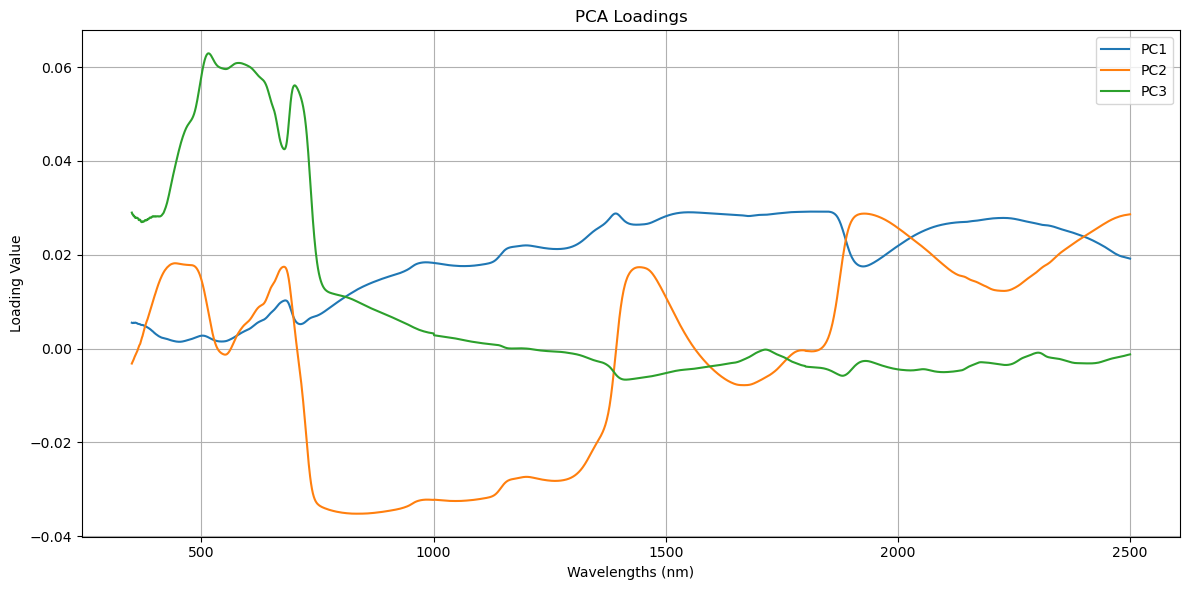

In [41]:
loadings = pca.components_ 

wavelengths = np.arange(350, 350 + len(spectral_columns))

plt.figure(figsize=(12, 6))
plt.plot(wavelengths, loadings[0], label='PC1')
plt.plot(wavelengths, loadings[1], label='PC2')
plt.plot(wavelengths, loadings[2], label='PC3')
plt.title('PCA Loadings')
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Loading Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Variance Explained by Each Principal Component:
[0.52734449 0.2675119  0.10695748 0.04212778 0.02031643 0.01512399
 0.00804636 0.00468616 0.00312591 0.00084772]


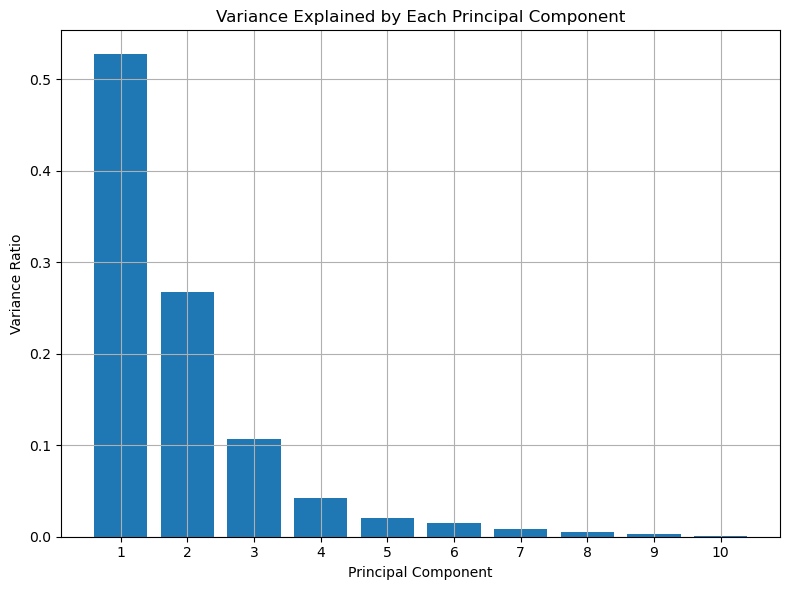

In [43]:
print("Variance Explained by Each Principal Component:")
print(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title("Variance Explained by Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

